# 準備

## 必要な関数の準備

In [1]:
# 必要なモジュールをimport
from random import randint

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

np.random.seed(1)  # 乱数を固定
np.set_printoptions(precision=4)  # 表示する桁数の設定

%matplotlib inline

In [2]:
# 決定境界 と データセット を可視化する関数群
def plot_decision_boundary(classifier, X, y):
    x1 = np.linspace(X[:, 0].min() - 1.0,
                     X[:, 0].max() + 1.0,
                     num=100)
    x2 = np.linspace(X[:, 1].min() - 1.0,
                     X[:, 1].max() + 1.0,
                     num=100)

    x1, x2 = np.meshgrid(x1, x2)

    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = classifier.predict(X_new).reshape(100, 100)

    plt.contourf(x1, x2, y_pred, alpha=.2, cmap="spring")


def plot_data(X, y):
    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0])
    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1])


def plot_tree(tree, X, y, ax):
    x1 = np.linspace(X[:, 0].min() - 1.0,
                     X[:, 0].max() + 1.0,
                     num=100)
    x2 = np.linspace(X[:, 1].min() - 1.0,
                     X[:, 1].max() + 1.0,
                     num=100)

    x1, x2 = np.meshgrid(x1, x2)

    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = tree.predict(X_new).reshape(100, 100)

    ax.contourf(x1, x2, y_pred, alpha=.2, cmap="spring")

    ax.scatter(X[:, 0][y == 0], X[:, 1][y == 0])
    ax.scatter(X[:, 0][y == 1], X[:, 1][y == 1])

## データの準備

In [3]:
from sklearn.datasets import make_moons

moons = make_moons(n_samples=100, noise=0.2)

X = moons[0]
y = moons[1]

In [4]:
# データの型
X.shape, y.shape

((100, 2), (100,))

In [5]:
# データを先頭から5件分確認する
print(X[:5, :])

[[ 1.367  -0.2354]
 [ 1.764  -0.3456]
 [-0.3787  0.41  ]
 [ 1.1511 -0.136 ]
 [ 2.3117  0.323 ]]


In [6]:
print(y[:5])

[1 1 0 1 1]


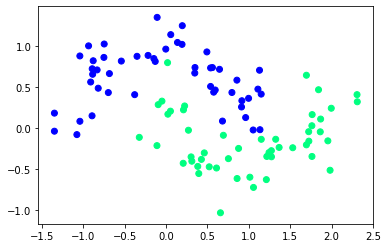

In [7]:
# データセットの可視化
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter")

In [8]:
# データセットの分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# あらためて決定木を試す

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier()

tree1.fit(X_train, y_train)


print(tree1.score(X_train, y_train))
print(tree1.score(X_test, y_test))

1.0
0.96


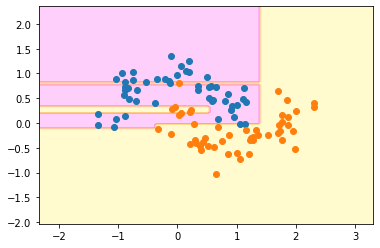

In [10]:
plot_decision_boundary(tree1, X, y)

plot_data(X, y)

plt.show()

# アンサンブル学習
- アンサンブル法は、複数の機械学習モデルを組み合わせて、より強力なモデルを構築する手法
- 2つの有名なアンサンブル
    - ランダムフォレスト
    - 勾配ブースティング決定木
       
## アンサンブル学習のポイント
- 決定木は過学習しやすい(モデルが複雑)
- ランダムフォレストの仮説
    - それぞれの決定木は比較的うまく予測できているが、一部のデータに対して過学習している
    - それらの決定木の平均をとれば、いい感じに過学習を抑制できるのではないか？       

## ランダムフォレスト
- ブートストラップサンプリング(復元抽出)

### イメージ
![](https://alphaimpact.jp/assets/2017/03/random_forest.png)

In [11]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=3, random_state=42)

In [12]:
random_forest.fit(X_train, y_train)

print(random_forest.score(X_train, y_train))
print(random_forest.score(X_test, y_test))

0.9733333333333334
0.96


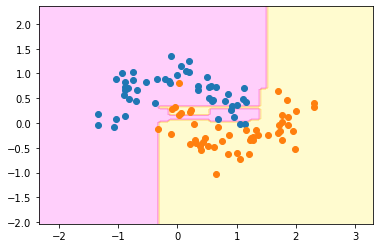

In [13]:
# 可視化
plot_decision_boundary(random_forest, X, y)

plot_data(X, y)

plt.show()

In [14]:
# 内部的に 3つの 決定木を持っている
random_forest.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1608637542, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1273642419, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                 

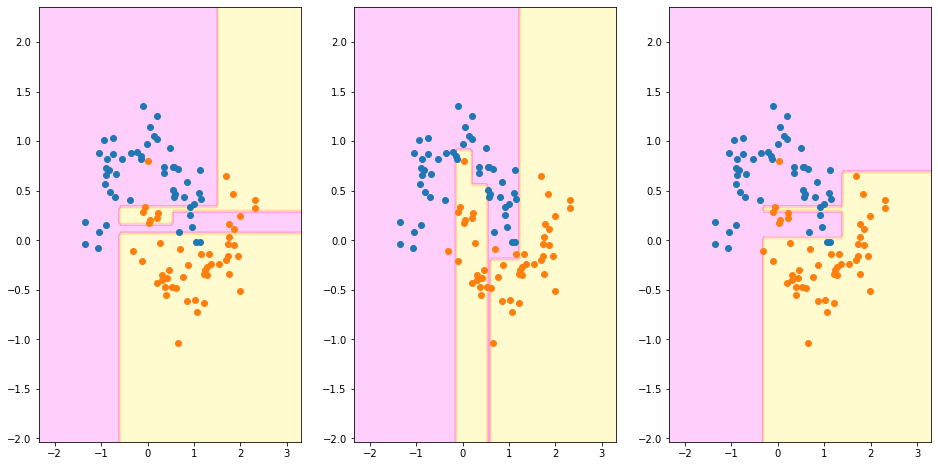

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

for ax, tree in zip(axes, random_forest.estimators_):
    plot_tree(tree, X, y, ax)

## 勾配ブースティング木(Gradient Boosted Trees)
- 弱いモデル(弱学習器)をつくり、逐次的に適合させていくアプローチ
- 1つ前の決定木の誤りを次の決定木が修正するようにして、決定木を順番に作っていく

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosted_tree = GradientBoostingClassifier(n_estimators=3,
                                                   random_state=0)
gradient_boosted_tree.fit(X_train, y_train)

print(gradient_boosted_tree.score(X_train, y_train))
print(gradient_boosted_tree.score(X_test, y_test))

0.92
0.88


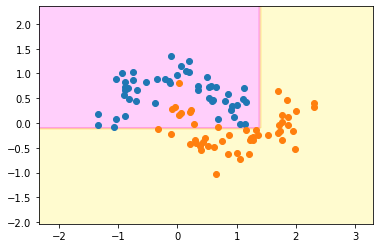

In [17]:
# 可視化
plot_decision_boundary(gradient_boosted_tree, X, y)

plot_data(X, y)

plt.show()

# 特徴量の重要度

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

/Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [21]:
gradient_boosted_tree = GradientBoostingClassifier(random_state=42)
gradient_boosted_tree.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

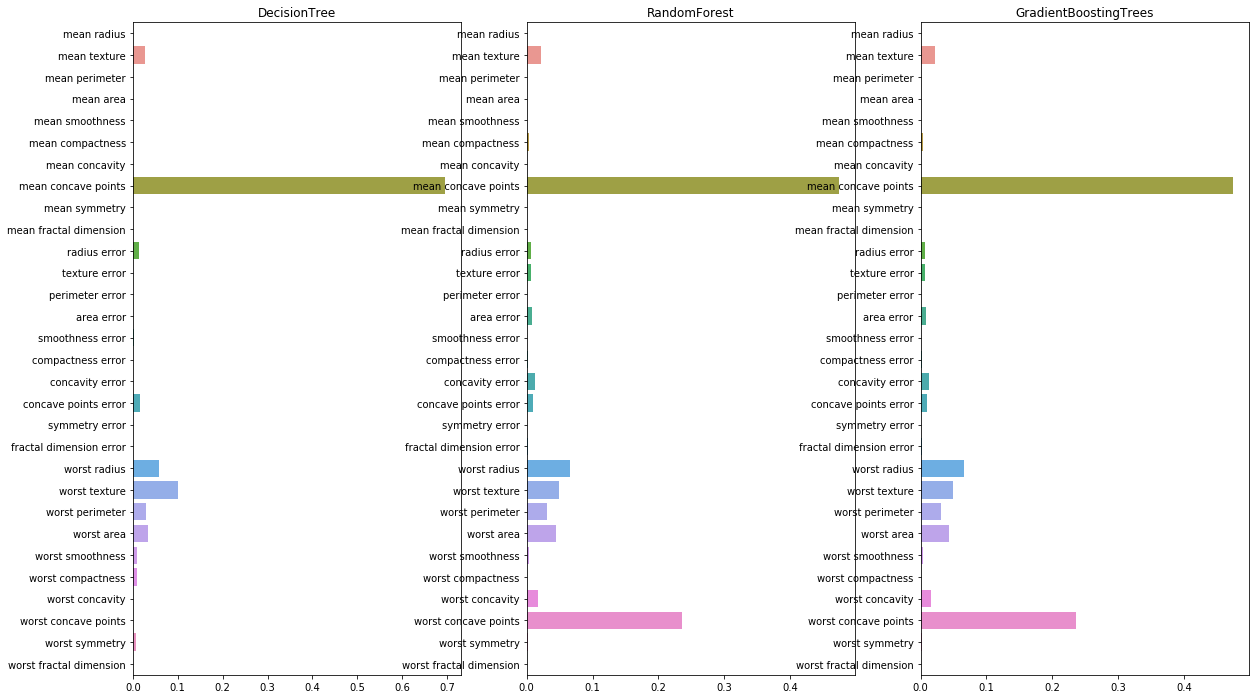

In [22]:
# 特徴量の重要度を可視化
fig, axes = plt.subplots(1, 3, figsize=(20, 12))

g1 = sns.barplot(x=decision_tree.feature_importances_,
                 y=cancer.feature_names,
                 orient="h",
                 ax=axes[0])
g1.set_title("DecisionTree")

g2 = sns.barplot(x=gradient_boosted_tree.feature_importances_,
                 y=cancer.feature_names,
                 orient="h",
                 ax=axes[1])
g2.set_title("RandomForest")

g3 = sns.barplot(x=gradient_boosted_tree.feature_importances_,
                 y=cancer.feature_names,
                 orient="h",
                 ax=axes[2])
g3.set_title("GradientBoostingTrees")

plt.show()